In [1]:
import matplotlib.pyplot as plt
import math as m
import numpy as np  # 1.7 or higher
from ipywidgets import interactive
from IPython.display import display



import qgrid
import pandas as pd

import sympy as sym
sym.init_printing(order="none")
from sympy.vector import CoordSys3D
import sympy.vector as symvec


np.set_printoptions(suppress=True, formatter={'float_kind':'{:14.4f}'.format})  
%matplotlib inline



In [2]:
# good sympy tutorial 
# https://dynamics-and-control.readthedocs.io/en/latest/0_Getting_Started/Notebook%20introduction.html

x = sym.Symbol('x')
x

In [3]:
# type \gamma<tab> to insert symbol
g = sym.Symbol('γ')
g

In [4]:
# https://docs.sympy.org/latest/modules/vector/
N = CoordSys3D('N')
N.i

In [5]:
v = 2*N.i + N.j
v

In [6]:
k = symvec.Cross(N.i, N.j)
k
#help(symvec.cross)

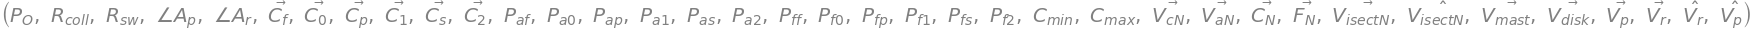

In [7]:
P0 = sym.Symbol(r'P_O');  #Origin of XYZ system
Rcoll = sym.Symbol(r'R_{coll}') #height of collective above origin
Rsw = sym.Symbol(r'R_{sw}') #radius of swashplate arms from P_coll

Ap = sym.Symbol(r'\angle{A_p}') #pitch angle
Ar = sym.Symbol(r'\angle{A_r}') #roll angle
Acyl = sym.Symbol(r'\angle{A_{cyl}}') # cylinder spacing

Cf, C0 = sym.symbols(r'\vec{C_f},\vec{C_0}') 
Cp, C1 = sym.symbols(r'\vec{C_p},\vec{C_1}')
Cs, C2 = sym.symbols(r'\vec{C_s},\vec{C_2}')

Ff, F0 = sym.symbols(r'\vec{F_f},\vec{F_0}') 
Fp, F1 = sym.symbols(r'\vec{F_p},\vec{F_1}') 
Fs, F2 = sym.symbols(r'\vec{F_s},\vec{F_2}') 

Vmast = sym.symbols(r'\vec{V_{mast}}')
Vdisk = sym.symbols(r'\vec{V_{disk}}')

Visectn, Visectnhat = sym.symbols(r'\vec{V_{isectN}},\hat{V_{isectN}}')
Vcn, Cn, Fn= sym.symbols(r'\vec{V_{cN}},\vec{C_N},\vec{F_N}')
Van = sym.symbols(r'\vec{V_{aN}}')

Paf, Pa0 = sym.symbols(r'P_a_f,P_a_0')
Pap, Pa1 = sym.symbols(r'P_a_p,P_a_1')
Pas, Pa2 = sym.symbols(r'P_a_s,P_a_2')

Pff, Pf0 = sym.symbols(r'P_f_f,P_f_0')
Pfp, Pf1 = sym.symbols(r'P_f_p,P_f_1')
Pfs, Pf2 = sym.symbols(r'P_f_s,P_f_2')
Cmin, Cmax = sym.symbols("C_m_i_n C_m_a_x")
Vp, Vr = sym.symbols(r'\vec{V_p} \vec{V_r}')
Vrhat = sym.Symbol(r'\hat{V_r}')
Vphat = sym.Symbol(r'\hat{V_p}')
"""C_f, C_0: Front linear actuator, vector representing length
C_p, C_1: Port linear actuator
C_s, C_2: Starboard linear actuator
P_a_f, P_a_0: End of front swashplate arm
P_a_p, P_a_1: End of port swashplate arm
P_a_s, P_a_2: End of starboard swashplate arm
P_f_f, P_f_0: End of front swashplate foot
P_f_p, P_f_1: End of port swashplate foot
P_f_s, P_f_2: End of starboard swashplate foot
C_min: cylinder minimum length
C_max: cylinder maximum length
Vp: Pitch vector from cyclic
Vr: Roll vector from cyclic"""
P0, Rcoll, Rsw, Ap, Ar, Cf, C0, Cp, C1, Cs, C2, Paf, Pa0, Pap, Pa1, Pas, Pa2, Pff, Pf0,\
Pfp, Pf1, Pfs, Pf2, Cmin, Cmax, Vcn, Van, Cn, Fn, Visectn, Visectnhat, Vmast, Vdisk,  Vp, Vr, Vrhat, Vphat

In [8]:
abs(abs(Vr))

In [9]:
sym.latex(abs(Vr))

'\\left|{\\vec{V_r}}\\right|'

\vec{V_p} = [cos(\angle{A_p})  0  sin(\angle{A_p})]

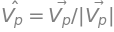

\vec{V_r} = [0  cos(\angle{A_r})  sin(\angle{A_r})]

\vec{F_f} = [R_{sw}  0  0]

\vec{F_p} = [R_{sw}⋅sin(\angle{A_{cyl}})  R_{sw}⋅cos(\angle{A_{cyl}})  0]

\vec{F_s} = [R_{sw}⋅sin(2⋅\angle{A_{cyl}})  R_{sw}⋅cos(2⋅\angle{A_{cyl}})  0]

\vec{V_{mast}} = [0  0  R_{coll}]

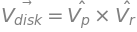

In [10]:
e1 = sym.Eq(Vp, sym.Matrix([sym.cos(Ap), 0, sym.sin(Ap)]).T, evaluate=False)
e2 = sym.Eq(Vphat, Vp/abs(Vp), evaluate=False)

e3 = sym.Eq(Vr, sym.Matrix([0, sym.cos(Ar), sym.sin(Ar)]).T, evaluate=False)
e4 = sym.Eq(Vrhat, Vr/abs(Vr), evaluate=False)

e5 = sym.Eq(Ff, sym.Matrix([Rsw, 0, 0]).T, evaluate=False)
e6 = sym.Eq(Fp, sym.Matrix([Rsw*sym.sin(Acyl), Rsw*sym.cos(Acyl), 0]).T, evaluate=False)
e7 = sym.Eq(Fs, sym.Matrix([Rsw*sym.sin(2*Acyl), Rsw*sym.cos(2*Acyl), 0]).T, evaluate=False)

e8 = sym.Eq(Vmast, sym.Matrix([0, 0, Rcoll]).T, evaluate=False)

e9 = sym.Eq(Vdisk, symvec.Cross(Vphat, Vrhat), evaluate=False)

# for each cylinder, Vcn normal of plane formed by foot and mast
e10 = sym.Eq(Vcn, symvec.Cross(Fn, Vmast), evaluate=False)
e11 = sym.Eq(Visectn, symvec.Cross(Vdisk, Vcn), evaluate=False)
e12 = sym.Eq(Visectnhat, Visectn/abs(Visectn), evaluate=False)
e13 = sym.Eq(Van, Rsw*Visectn+Vmast, evaluate=False)
e14 = sym.Eq(Cn, Van - Fn, evaluate=False)

for e in [e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14]:
    display(e)
